# **Lab 2 - Data Cleaning**

In [1]:
import pandas as pd
import numpy as np

file = 'Iris-Unclean.csv'
df = pd.read_csv(file)

In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,0.0,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
len(df)

152

**use describe() to learn about the distribution of each feature & comment on any unordinary results**

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,149.000000,150.000000,149.000000,151.000000
mean,75.756579,6.534228,3.336000,4.044966,1.156954
std,43.845303,7.587523,4.031275,4.814413,0.776102
min,1.000000,0.000000,-5.000000,0.000000,0.000000
25%,38.750000,5.000000,2.700000,1.500000,0.200000
50%,75.500000,5.800000,3.000000,4.300000,1.300000
75%,113.250000,6.400000,3.300000,5.100000,1.800000
max,150.000000,72.000000,32.000000,58.000000,2.500000


In [5]:
import matplotlib.pyplot as plt

**use scatter plot to plot the values of each feature**

In [6]:
def features_scatterPlot(df, c = False):
    fig=plt.subplots(figsize=(15,8))
    for i, j in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
        plt.subplot(2, 2, i+1)
        plt.subplots_adjust(hspace = 1, wspace= 0.33)
        if c:
          plt.scatter(x = df.index,y = df[j], c = df.iloc[:,i+5])
            ## if c is True, plot the zero values with different color

            
        else:
          plt.scatter(x = df.index,y = df[j])
            ## else, just plot all the values with the same color

            

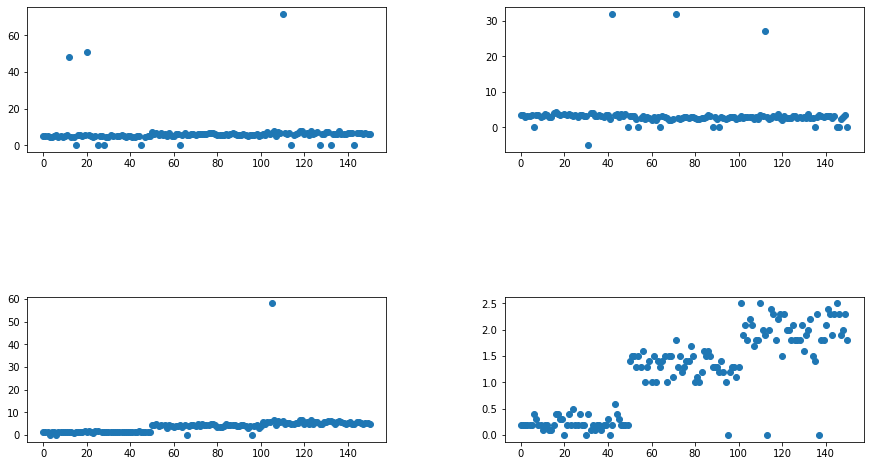

In [7]:
features_scatterPlot(df)

**use isna() and compute the number of the null values in each feature**

In [8]:
print("*****the number of nulls in the dataset*****")
print(df.isna().sum())
print("*****the total number of nulls in the dataset*****")
df.isna().sum().sum()



*****the number of nulls in the dataset*****
Id               0
SepalLengthCm    3
SepalWidthCm     2
PetalLengthCm    3
PetalWidthCm     1
Species          8
dtype: int64
*****the total number of nulls in the dataset*****


17

**Delete the Id column**

In [9]:
df = df.drop(['Id'], axis=1)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,0.0,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


**Find out the percentage of missing values, rounded to 2 decimal places**


In [11]:
## your code here
print("percentage = ",round(df.isna().sum().sum()/(len(df)*len(df.columns))*100,2),'%')



percentage =  2.24 %


**1- Extract the names of different types of Iris species**

**2- Create a new dataframe containing only valid species (Valid species format: Iris-"name")**


In [12]:
## your code here
sp = pd.unique(df['Species'])
sp

array(['Iris-setosa', 'Irisssssss', 'Irooooos', 'Stakooza', nan,
       'Iris-versicolor', 'Color', 'Colors', 'IRIS', 'Iris-virginica',
       'DeleteMe'], dtype=object)

In [13]:
df = df[(df.Species == 'Iris-setosa') | (df.Species == 'Iris-versicolor') | (df.Species == 'Iris-virginica')]

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,0.0,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


**replace the negative values with zeros**

In [15]:
## your code here
for col in df.iloc[:,:-1].columns:
  df[col][df[col]<0]=0



In [16]:
## your code here
for col in df.iloc[:,:-1].columns:
  print(df[col][df[col]<0])



Series([], Name: SepalLengthCm, dtype: float64)
Series([], Name: SepalWidthCm, dtype: float64)
Series([], Name: PetalLengthCm, dtype: float64)
Series([], Name: PetalWidthCm, dtype: float64)


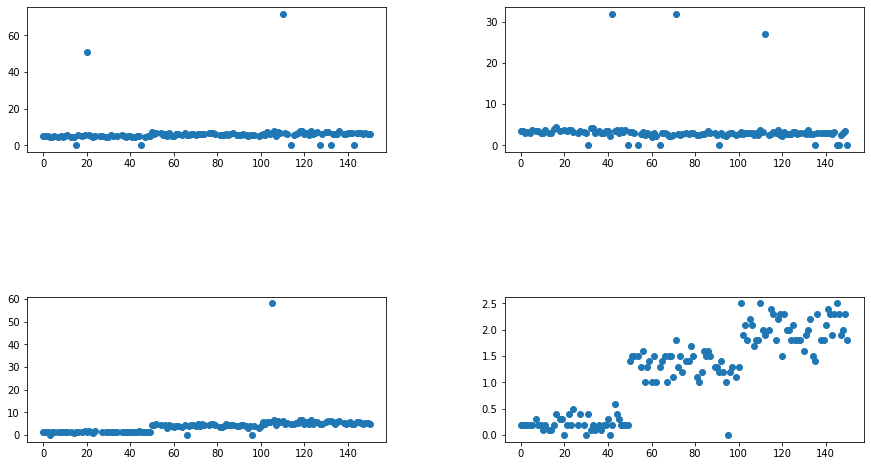

In [17]:
features_scatterPlot(df)

In [18]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,134.000000,135.000000,134.000000,136.000000
mean,6.419403,3.445926,4.129104,1.201471
std,7.078587,4.175457,5.035585,0.777173
min,0.000000,0.000000,0.000000,0.000000
25%,5.025000,2.700000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.475000,3.300000,5.100000,1.800000
max,72.000000,32.000000,58.000000,2.500000


**create 4 new columns, [SepalLengthColor, SepalWidthColor, PetalLengthColor, PetalWidthColor], each with value 'r' if the feature value is zero and 'b' otherwise**

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,0.0,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [20]:
## your code here
color = lambda x: 'r' if x==0 else 'b'
df['SepalLengthColor'] = df.SepalLengthCm.apply(color)
df['SepalWidthColor'] = df.SepalWidthCm.apply(color)
df['PetalLengthColor'] = df.PetalLengthCm.apply(color)
df['PetalWidthColor'] = df.PetalWidthCm.apply(color)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b
3,4.7,3.2,0.0,0.2,Iris-setosa,b,b,r,b
4,4.6,3.1,1.5,0.2,Iris-setosa,b,b,b,b


In [21]:
df["PetalWidthColor"].value_counts()

b    132
r      4
Name: PetalWidthColor, dtype: int64

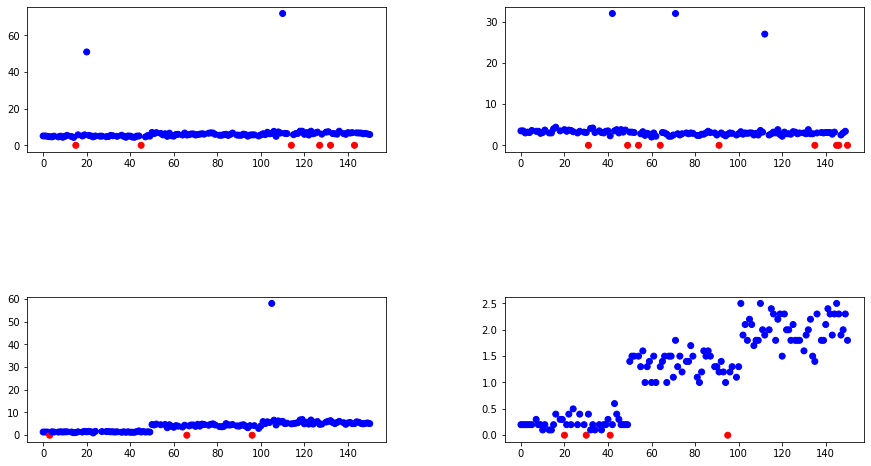

In [22]:
features_scatterPlot(df, True)

**Replace all zeros with numpy's NaN**

In [23]:
## your code here

df = df.replace(0, np.NaN)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b
3,4.7,3.2,NaN,0.2,Iris-setosa,b,b,r,b
4,4.6,3.1,1.5,0.2,Iris-setosa,b,b,b,b
...,...,...,...,...,...,...,...,...,...
146,6.7,NaN,5.2,2.3,Iris-virginica,b,r,b,b
147,6.3,2.5,5.0,1.9,Iris-virginica,b,b,b,b
148,6.5,3.0,5.2,2.0,Iris-virginica,b,b,b,b
149,6.2,3.4,5.4,2.3,Iris-virginica,b,b,b,b


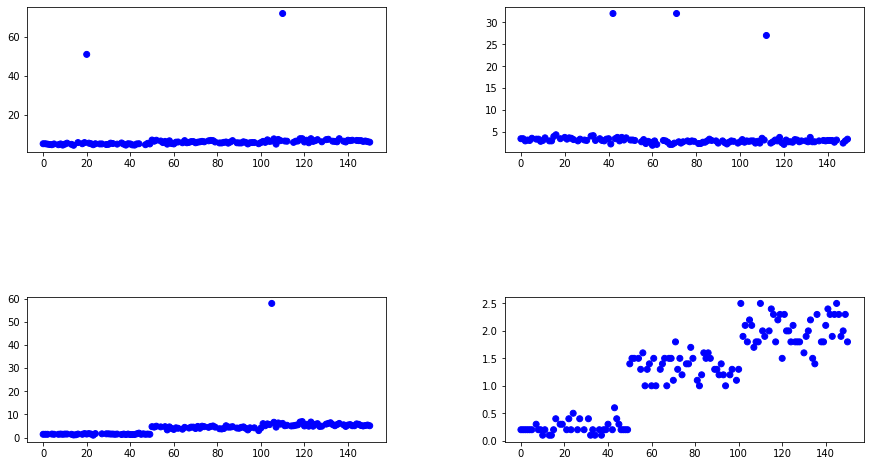

In [24]:
features_scatterPlot(df, True)

**Create two copies of the dataframe**



In [25]:
## your code here
dfcopy = df.copy()
dfcopy2 = df.copy()

**First copy:  replace all the NaN values with the respective attribute's/column's mean**


In [26]:
## your code here
dfcopy = dfcopy.fillna(dfcopy.mean())
dfcopy



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,5.1,3.500000,1.400000,0.2,Iris-setosa,b,b,b,b
1,5.1,3.500000,1.400000,0.2,Iris-setosa,b,b,b,b
2,4.9,3.000000,1.400000,0.2,Iris-setosa,b,b,b,b
3,4.7,3.200000,4.223664,0.2,Iris-setosa,b,b,r,b
4,4.6,3.100000,1.500000,0.2,Iris-setosa,b,b,b,b
...,...,...,...,...,...,...,...,...,...
146,6.7,3.692063,5.200000,2.3,Iris-virginica,b,r,b,b
147,6.3,2.500000,5.000000,1.9,Iris-virginica,b,b,b,b
148,6.5,3.000000,5.200000,2.0,Iris-virginica,b,b,b,b
149,6.2,3.400000,5.400000,2.3,Iris-virginica,b,b,b,b


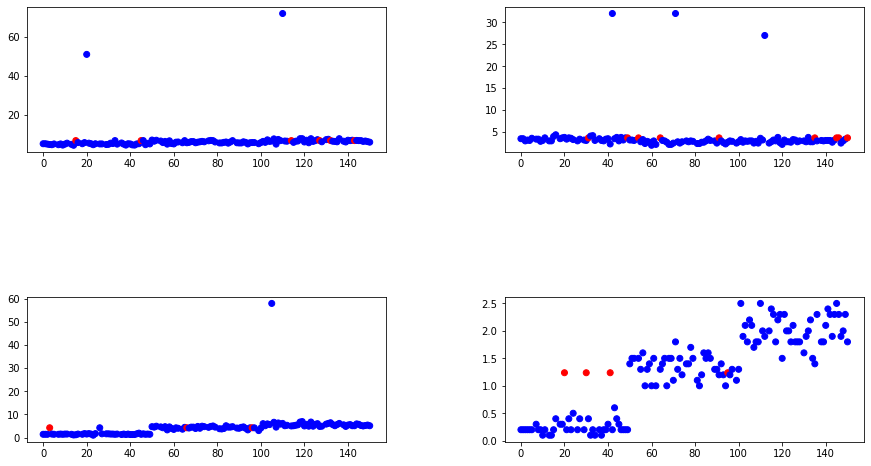

In [29]:
features_scatterPlot(dfcopy, True)


**Second copy: group each species and replace all the NaN values with the respective attribute's/column's mean related to its species**

In [30]:
## your code here
## group by species
gb = dfcopy2.groupby('Species')
gb.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
0,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
1,5.1,3.5,1.4,0.2,Iris-setosa,b,b,b,b
2,4.9,3.0,1.4,0.2,Iris-setosa,b,b,b,b
3,4.7,3.2,NaN,0.2,Iris-setosa,b,b,r,b
4,4.6,3.1,1.5,0.2,Iris-setosa,b,b,b,b
50,7.0,3.2,4.7,1.4,Iris-versicolor,b,b,b,b
51,6.4,3.2,4.5,1.5,Iris-versicolor,b,b,b,b
52,6.9,3.1,4.9,1.5,Iris-versicolor,b,b,b,b
54,6.5,NaN,4.6,1.5,Iris-versicolor,b,r,b,b
55,5.7,2.8,NaN,1.3,Iris-versicolor,b,b,b,b


**get each group as a separate data frame and make a list of the small dataframes**

*hint: use grouped_df.groups and grouped_df.get_group()*

In [31]:
## your code here

gbs = [gb.get_group(x) for x in gb.groups]
gbs[1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthColor,SepalWidthColor,PetalLengthColor,PetalWidthColor
50,7.0,3.2,4.7,1.4,Iris-versicolor,b,b,b,b
51,6.4,3.2,4.5,1.5,Iris-versicolor,b,b,b,b
52,6.9,3.1,4.9,1.5,Iris-versicolor,b,b,b,b
54,6.5,NaN,4.6,1.5,Iris-versicolor,b,r,b,b
55,5.7,2.8,NaN,1.3,Iris-versicolor,b,b,b,b
56,6.3,3.3,4.7,1.6,Iris-versicolor,b,b,b,b
57,4.9,2.4,3.3,1.0,Iris-versicolor,b,b,b,b
58,6.6,2.9,4.6,1.3,Iris-versicolor,b,b,b,b
59,5.2,2.7,3.9,1.4,Iris-versicolor,b,b,b,b
60,5.0,2.0,3.5,1.0,Iris-versicolor,b,b,b,b


**loop over each feature in each group and replace the nans with the mean of that feature in this group**

In [32]:
## your code here
for i in range(len(gbs)):
  for j in range(4):
    gbs[i].iloc[:,j] = gbs[i].iloc[:,j].fillna(gbs[i].iloc[:,j].mean())


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


**concatenate all the groups together in a single dataframe**

In [33]:
## your code here
data = gbs[0]
for g in gbs[1:]:
  data = data.append(g)


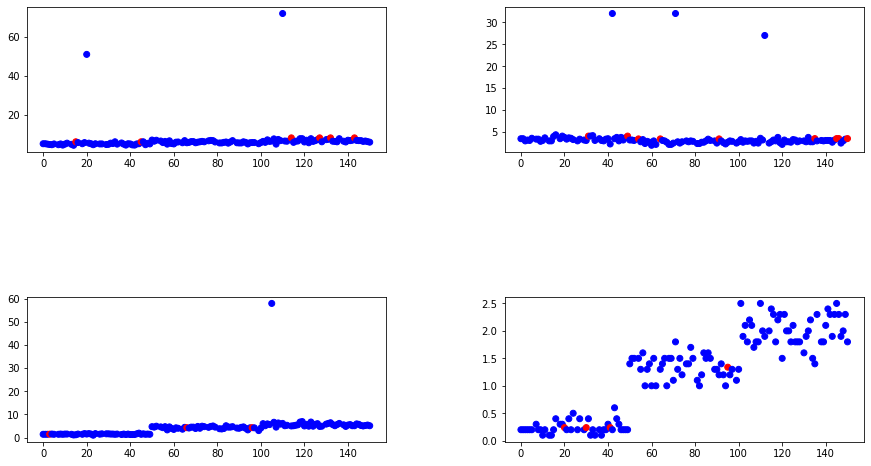

In [34]:
features_scatterPlot(data, True)